In [1]:
from aggregation_read_data import Parse_agg_data
from aggregation_read_data import draw_aggregation_data

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

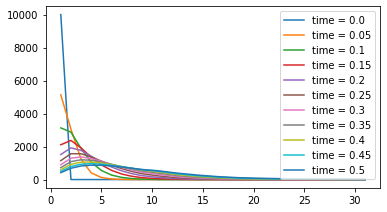

In [4]:
draw_aggregation_data('file_2020-02-08 18:45:18.txt',graph='plot',interactive=False,normalize=False)

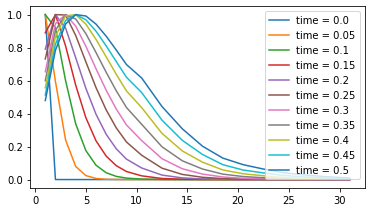

In [5]:
draw_aggregation_data('file_2020-02-08 18:45:18.txt',graph='plot',interactive=False,normalize=True)

Interactive plot and barplot are supported, but unfortunately they work badly with jupyter notebook

In [9]:
filename = 'file_2020-01-19 16:02:11'+'.txt'
# N, N0, dt, mass_min, mass_max, time, number, mass, weight, width = Parse_agg_data(filename)
experiment = Parse_agg_data(filename)
B = 15 / experiment.N0

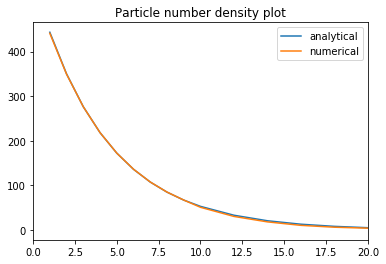

Time: 0.5


In [10]:
from aggregation_analytical_solution import Solution

index = -1

plt.plot(experiment.mass_min, Solution(experiment.mass_min,  experiment.time[index],  experiment.N0,  B), label='analytical')
plt.plot(experiment.mass_min, experiment.number[index,:]/experiment.width, label='numerical')
plt.xlim([0,20])
#plt.ylim([1000,1500])
plt.title('Particle number density plot')
plt.legend()
plt.show()
print('Time:',experiment.time[index])

In [5]:
# timelist = list(time)
# index = timelist.index(0.05)
# plt.plot(mass_min,number[index,:], label='numerical')
# #plt.plot(mass_min,Solution(mass_min, step*dt, N0, B),label='analytical')
# plt.xlim([0,20])
# plt.legend()
# plt.show()
# print('Time:',step*dt)

# Mean mass time evolution w.r.t. time step

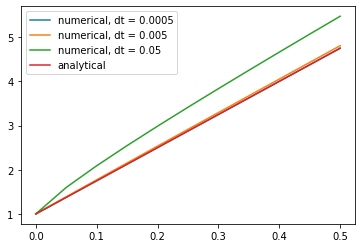

In [20]:
  for file in ['file_2020-01-19 16:02:11','file_2020-01-19 16:07:18','file_2020-01-19 16:08:06']:
    filename = file + '.txt'
#     N, N0, dt, mass_min, mass_max, time, number, mass, weight, width = Parse_agg_data(filename)
    exp = Parse_agg_data(filename)
    plt.plot(exp.time, exp.mass.sum(axis=1) / exp.number.sum(axis=1), label='numerical, dt = '+str(exp.dt))
    
masses = []
mass_range = range(1,int(experiment.mass_min[-1]))
for t in exp.time:
    num = np.array(Solution(mass_range, t, experiment.N0, B))
    m = np.array(num * mass_range).sum() / num.sum()
    masses.append(m)

plt.plot(exp.time, masses,label='analytical')

plt.legend()
plt.show()

It's a linear function!

0.05 seems too big for time step

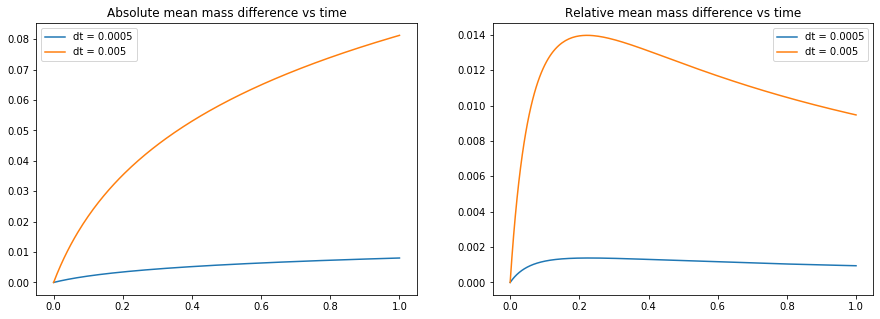

In [65]:
mean_mass_num = []
mean_mass_an = []
time_points = []
time_deltas = []
for file in ['file_2020-01-19 16:16:40','file_2020-01-19 16:16:28']:
    filename = file + '.txt'
    exp = Parse_agg_data(filename)
    # calculate mean mass for numerical solution
    mean_mass_num.append(exp.mass.sum(axis=1) / exp.number.sum(axis=1))
    # calculate mean mass from analytical solution (good enough approximation)
    masses = []
    mass_range = range(1,int(exp.mass_min[-1]))
    for t in exp.time:
        num = np.array(Solution(mass_range, t, exp.N0, B))
        m = np.array(num * mass_range).sum() / num.sum()
        masses.append(m)
    mean_mass_an.append(masses)
    time_points.append(exp.time)
    time_deltas.append(exp.dt)

fig, a =  plt.subplots(1,len(mean_mass_num), figsize=(15,5))
for i, mean_mass in enumerate(mean_mass_num):
    a[0].plot(time_points[i], mean_mass - mean_mass_an[i], label='dt = ' + str(time_deltas[i]))
    a[1].plot(time_points[i], (mean_mass - mean_mass_an[i]) / mean_mass, label='dt = ' + str(time_deltas[i]))
a[0].set_title('Absolute mean mass difference vs time')
a[1].set_title('Relative mean mass difference vs time')
a[0].legend()
plt.show()

Aha! Our numerical calculation error is not linear after all! In fact, relative error starts to decline after reaching it's peak value

would be nice to look at those graphs with at least 10 s

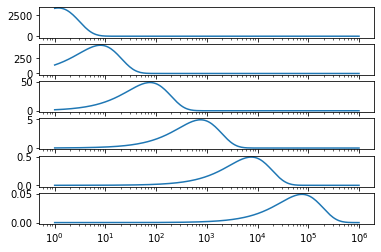

In [35]:
# mass_range = range(1,1000000)
mass_range = np.logspace(0,6,num=200)

times = [0.1,1,10,100,1000,10000]
fig, a =  plt.subplots(len(times),1)
for i, t in enumerate(times):
    num = np.array(Solution(mass_range, t, exp.N0, B))
    a[i].plot(mass_range, num*mass_range,label=str(t))
    a[i].set_xscale('log')
#     a[i].set_title(str(t))
# plt.legend()
plt.show()

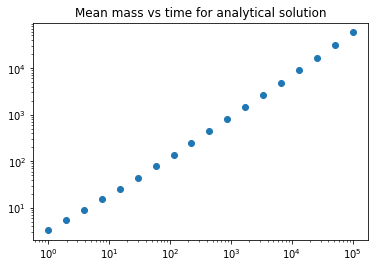

In [86]:
# mass_range = range(1,1000000)
mass_range = np.logspace(0,8,num=1000)
times = np.logspace(0,5,num=18)
# times = [1,10,100,1000,10000]
for i, t in enumerate(times):
    num = np.array(Solution(mass_range, t, exp.N0, B))
    mean_mass = (num*mass_range).sum() / num.sum() - 1 
    plt.plot(t, mean_mass,'o',color='tab:blue')
# fig, a =  plt.subplots(len(times),1)
# for i, t in enumerate(times):
#     num = np.array(Solution(mass_range, t, exp.N0, B))
#     a[i].plot(mass_range, num*mass_range,label=str(t))
#     a[i].set_xscale('log')
#     a[i].set_title(str(t))
# plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Mean mass vs time for analytical solution')
plt.show()

mean mass changes approximately linearly with time when kernel is constant

Check dependence of calculation error on the number of buckets (N)